<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-QWTKZyjpPEjISv5WaRU9OFeRpok6YctnYmDr5pNlyT2bRjXh0JMhjY6hW+ALEwIH" crossorigin="anonymous">


<div id="intro" class="text-center bg-image shadow-1-strong">
  <style>
    #intro {
      background-image: url('https://s14415.pcdn.co/wp-content/uploads/2015/01/sentiment-analysis.jpg');
      background-size: cover;
      background-repeat: no-repeat;
    }
  </style>
  <div class="mask p-5" style="background-color: rgba(0, 0, 0, 0.7);">
    <div class="h-100">
      <div class="text-white px-4 fw-bold" data-mdb-theme="dark">
        <h1 class="mb-3 text-capitalize">TP : Analyse de sentiment des critiques de films provenant d'IMDb (Internet Movie Database)</h1>
        <h3 id="time-counter" class="border border-light my-4 p-4"></h3>
        <div class='row d-flex justify-content-center my-4'>
        <div class='col-4 text-start'>
          <p>Développé par :</p>
          <ul class="list-group">
            <li class="list-group-item">LOUKILIA YASSIR</li>
            <li class="list-group-item">MSADEK ACHRAF</li>
            <li class="list-group-item">MAFTOUH MERYEM</li>
            <li class="list-group-item">HRACH RAS SALMA</li>
          </ul>
        </div>
        <div class='col-4 text-start'>
          <p>Supervisé par :</p>
          <ul class="list-group">
            <li class="list-group-item">OURDOU AMAL</li>
          </ul>
        </div>
        </div>
      </div>
    </div>
  </div>
</div>

## Exploration des données (EDA) :

### 1. Importer les bibliothèques nécessaires :

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


### 2. Charger le jeu de données :

In [59]:
data=pd.read_csv("IMDB Dataset.csv",delimiter=",")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### 3. Visualiser les informations sur le jeu de données :


**Informations générales :**

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Visualiser la distribution des sentiments :**

In [61]:
# Sélectionner les deux premières critiques positives
critiques_positives = data[data['sentiment'] == 'positive']['review'].head(2).values
# Sélectionner les deux premières critiques négatives
critiques_negatives = data[data['sentiment'] == 'negative']['review'].head(2).values

# Afficher quelques exemples de critiques positives
print("Quelques exemples de critiques positives :\n")
for critique in critiques_positives:
    print(critique)
    print('\n' + '-'*50 + '\n')

# Afficher quelques exemples de critiques négatives
print("\nQuelques exemples de critiques négatives :\n")
for critique in critiques_negatives:
    print(critique)
    print('\n' + '-'*50 + '\n')


Quelques exemples de critiques positives :

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say t

C:\Users\yassi\AppData\Local\Temp\ipykernel_27972\2841025352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


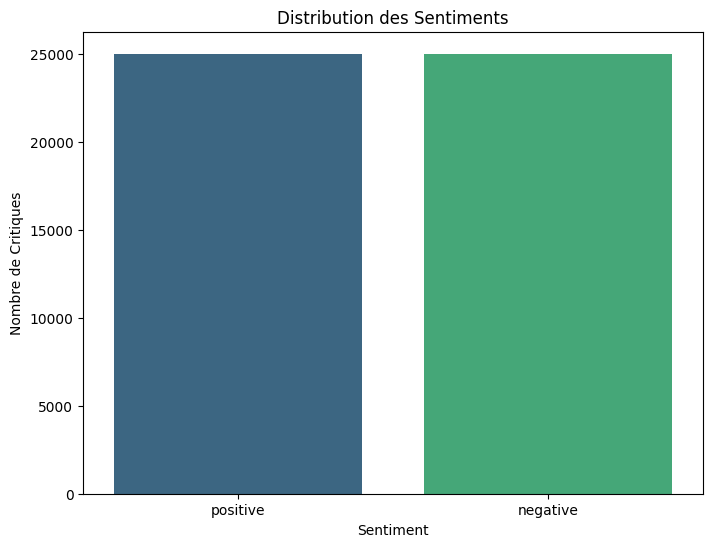

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Critiques')
plt.show()

**Visualiser les mots les plus fréquents dans les critiques positives et négatives :**

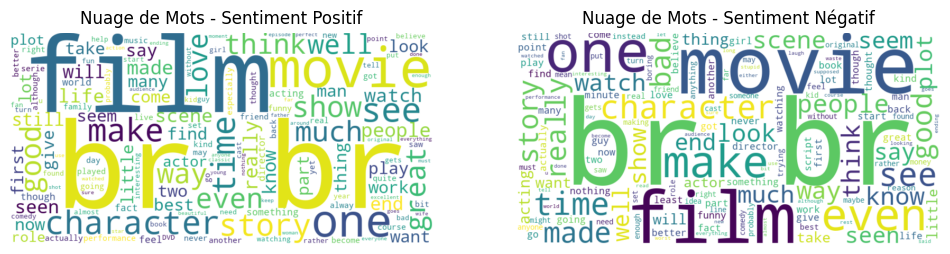

In [63]:
# Combiner les critiques positives en une seule chaîne
critiques_positives = data[data['sentiment'] == 'positive']['review'].str.cat(sep=' ')
# Combiner les critiques négatives en une seule chaîne
critiques_negatives = data[data['sentiment'] == 'negative']['review'].str.cat(sep=' ')

# Générer des nuages de mots pour les critiques positives et négatives
nuage_mots_positif = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(critiques_positives)
nuage_mots_negatif = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(critiques_negatives)

# Créer une figure pour afficher les nuages de mots
plt.figure(figsize=(12, 6))

# Afficher le nuage de mots pour les critiques positives
plt.subplot(1, 2, 1)
plt.imshow(nuage_mots_positif, interpolation='bilinear')
plt.title('Nuage de Mots - Sentiment Positif')
plt.axis('off')

# Afficher le nuage de mots pour les critiques négatives
plt.subplot(1, 2, 2)
plt.imshow(nuage_mots_negatif, interpolation='bilinear')
plt.title('Nuage de Mots - Sentiment Négatif')
plt.axis('off')

# Afficher la figure
plt.show()

## Prétraitement : 

### 1. Nettoyage des Données :

**Supprimer les doublons :**

In [64]:
data.drop_duplicates(inplace=True)

**Suppression des caractères spéciaux et ponctuations et les balises HTML :**

In [65]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Supprimer les balises HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères spéciaux et les chiffres
    return text

# Appliquer la fonction de nettoyage à la colonne 'review' et stocker les résultats dans une nouvelle colonne 'cleaned_review'
data['cleaned_review'] = data['review'].apply(clean_text)

# Afficher la première critique nettoyée
data['cleaned_review'][0]


'One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty picture

### 2. Tokenisation :

__exemple:__ 

`i really love this movie` => `[i, really, love, this, movie]`


In [66]:
# Tokeniser les critiques nettoyées
data['review_tokens'] = data['cleaned_review'].apply(word_tokenize)

### 3. Normalisation et Suppression des Stopwords :

__exemple:__ 

`["i", "really", "love", "THIS", "movie"]` 

=> `["i", "really", "love", "this", "movie"]`

=>`["really", "love", "movie"]`

In [67]:
# Définir l'ensemble des mots vides en anglais
stop_words = set(stopwords.words('english'))

# Normaliser les critiques en supprimant les mots vides et en mettant les mots en minuscules
data['normalized_review'] = data['review_tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

### 4. Stemming ou Lemmatisation :

__exemple:__ 

`movies`=>`movie`

In [68]:
# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Lemmatizer les critiques normalisées
data['lemmatized_review'] = data['normalized_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Sélectionner les colonnes 'lemmatized_review' et 'sentiment'
colonnes = ['lemmatized_review', 'sentiment']
data_nettoyee = data[colonnes]

# Renommer la colonne 'lemmatized_review' en 'review'
data_nettoyee.rename(columns={'lemmatized_review': 'review'}, inplace=True)

# Afficher les données nettoyées
data_nettoyee

C:\Users\yassi\AppData\Local\Temp\ipykernel_27972\1776077345.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nettoyee.rename(columns={'lemmatized_review': 'review'}, inplace=True)


,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


### 5. Division de données en ensembles d'entraînement et de test:

In [69]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    data_nettoyee['review'],  # Les critiques (features)
    data_nettoyee['sentiment'],  # Les sentiments (labels)
    test_size=0.2,  # Taille de l'ensemble de test (20% des données)
    random_state=42  # Fixer l'aléatoire pour reproduire les résultats
)

### 6. La Vectorisation :

In [70]:
# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Convertir chaque liste de mots en une chaîne de texte
X_train_str = [" ".join(words) for words in X_train]
X_test_str = [" ".join(words) for words in X_test]

# Appliquer la vectorisation sur les données d'entraînement et de test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)

In [71]:
# Définir le nom de fichier pour sauvegarder le modèle de vectorisation TF-IDF
model_filename_tfidf = 'tfidf_vectorizer.joblib'

# Sauvegarder le modèle de vectorisation TF-IDF dans un fichier
joblib.dump(tfidf_vectorizer, model_filename_tfidf)

# Afficher un message de confirmation de sauvegarde
print(f"Modèle de Tfidf sauvegardé avec succès dans le fichier : {model_filename_tfidf}")

Modèle de Tfidf sauvegardé avec succès dans le fichier : tfidf_vectorizer.joblib


## Entraînement et  evaluation du modèle :

### Naive Bayes :

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


Précision (Naive Bayes): 0.86

Rapport de classification (Naive Bayes):
               precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4939
    positive       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



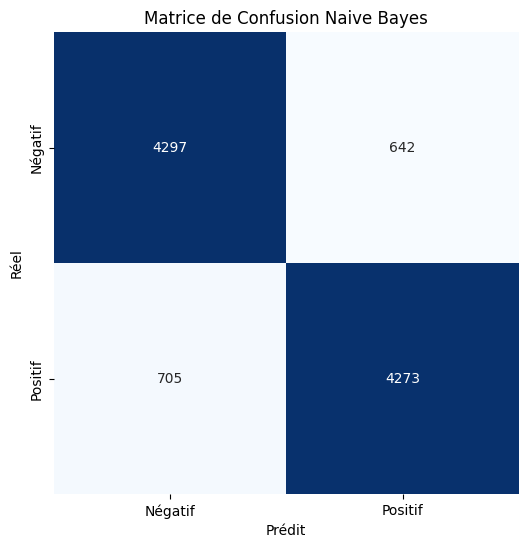

In [73]:
def plot_confusion_matrix(conf_matrix, title):
    # Créer une figure pour afficher la matrice de confusion
    plt.figure(figsize=(6, 6))
    
    # Tracer la matrice de confusion sous forme de heatmap
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Négatif', 'Positif'],  # Étiquettes de l'axe des x
                yticklabels=['Négatif', 'Positif'])  # Étiquettes de l'axe des y
    
    # Ajouter un titre à la figure
    plt.title(title)
    
    # Ajouter un label à l'axe des abscisses
    plt.xlabel('Prédit')
    
    # Ajouter un label à l'axe des ordonnées
    plt.ylabel('Réel')
    
    # Afficher la figure
    plt.show()

# Initialiser et entraîner le modèle Naive Bayes Multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred_nb = nb_model.predict(X_test_tfidf)

# Évaluer les performances du modèle Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Précision (Naive Bayes): {accuracy_nb:.2f}')

# Rapport de classification
print('\nRapport de classification (Naive Bayes):\n', classification_report(y_test, y_pred_nb))

# Matrice de confusion pour Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Tracer la matrice de confusion pour Naive Bayes
plot_confusion_matrix(nb_conf_matrix, "Matrice de Confusion Naive Bayes")


### Régression Logistique :

Précision de la Régression Logistique: 0.8917011192901079
Rapport de classification de la Régression Logistique:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4939
    positive       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



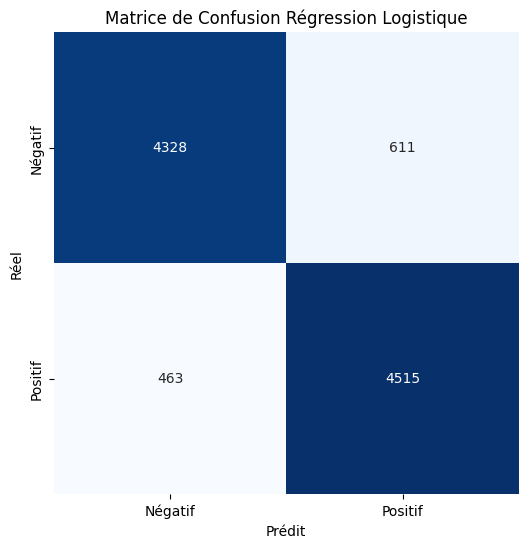

In [74]:
# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression()

# Entraînement du modèle
logistic_model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Évaluation des performances
print("Précision de la Régression Logistique:", accuracy_score(y_test, logistic_predictions))
print("Rapport de classification de la Régression Logistique:\n", classification_report(y_test, logistic_predictions))

# Matrice de confusion pour Régression Logistique
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Tracer la matrice de confusion pour Régression Logistique
plot_confusion_matrix(logistic_conf_matrix, "Matrice de Confusion Régression Logistique")

## Sauvegarde de modèle :

In [75]:
# Sauvegarder le modèle Naive Bayes
model_filename_nb = 'sentiment_model_naive_bayes.joblib'
joblib.dump(nb_model, model_filename_nb)
print(f"Modèle Naive Bayes sauvegardé avec succès dans le fichier : {model_filename_nb}")

# Sauvegarder le modèle de Régression Logistique
model_filename_logistic = 'sentiment_model_logistic_regression.joblib'
joblib.dump(logistic_model, model_filename_logistic)
print(f"Modèle de Régression Logistique sauvegardé avec succès dans le fichier : {model_filename_logistic}")


Modèle Naive Bayes sauvegardé avec succès dans le fichier : sentiment_model_naive_bayes.joblib
Modèle de Régression Logistique sauvegardé avec succès dans le fichier : sentiment_model_logistic_regression.joblib


### 2. Charger le jeu de données :

## Interprétation des Résultats : (Écrire vos propres résultats.)

### Naive Bayes :

- Accuracy: Le modèle a une précision globale de 86%, ce qui est décent.
- Classification Report: Les métriques de précision, rappel et f1-score sont équilibrées pour les classes positive et négative.
- Matrice de Confusion: Le modèle a tendance à avoir plus de faux négatifs que de faux positifs.

### Régression Logistique :

- Accuracy: Le modèle de régression logistique a une précision globale de 89.17%, légèrement supérieure à Naive Bayes.
- Classification Report: Les métriques de précision, rappel et f1-score sont équilibrées pour les deux classes.
- Matrice de Confusion: Le modèle de régression logistique a une performance globale plus élevée avec moins d'erreurs de classification.

### Choix du Modèle :

La régression logistique semble être le choix préférable, car elle a une accuracy légèrement supérieure et des performances globales meilleures, avec moins d'erreurs de classification.


### Testé le modèles sur des exemples réels :

__Positive Reviews:__

The movie was absolutely fantastic! The storyline, characters, 
and visuals were all top-notch. I highly recommend it to everyone.

__Negative Reviews:__

I was very disappointed with this movie. The plot was confusing, 
and the characters were poorly developed. I wouldn't recommend it to anyone.

## Interface de test :

In [76]:
!pip install gradio
import gradio as gr

# Charger le modèle et le vectorizer
model = joblib.load('sentiment_model_logistic_regression.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Fonction de prédiction
def predict_sentiment(review):
    review = [review]
    review_vectorized = vectorizer.transform(review)
    prediction = model.predict(review_vectorized)
    sentiment = 'Positive' if prediction == 'positive' else 'Negative'
    return sentiment
    
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=[
        gr.Textbox(label="Review", placeholder="Enter a movie review here...")
    ],
    outputs=[
        gr.Textbox(label="Sentiment"),
    ],
    title="Movie Review Sentiment Analysis",
    description="Enter a movie review and the model will predict whether the sentiment is positive or negative."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
